# Временные ряды 3. 

# ARIMA



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import itertools

In [2]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from random import random
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения

## Пример искусственный

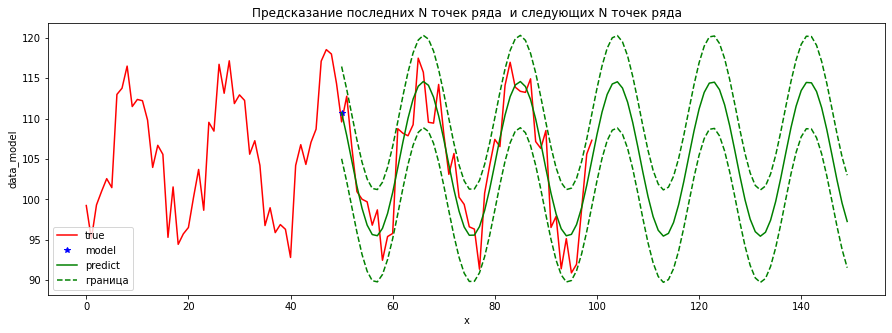

In [7]:
# ARIMA пример

# модельный ряд
np.random.seed(21)
# data_model = [100+x*1 + 20*np.random.random(1) for x in range(1, 1000)] #[1,1,1]
data_model = [100 +10*np.sin(x/3) + 10*np.random.random(1) for x in range(1, 1000)] # [2,0,2]
N=50   # число точек для теста
# строим модель
model = ARIMA(data_model[:-N], order=(2,0,2))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)

plt.figure(figsize=(15,5))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

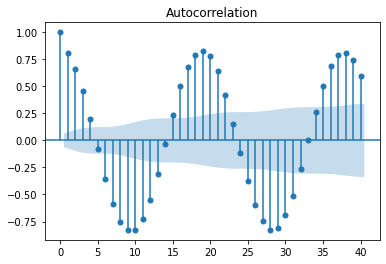

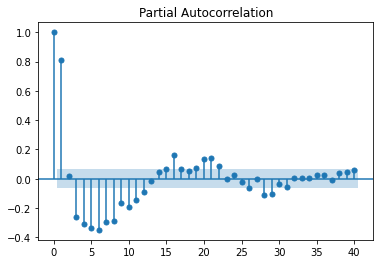

In [5]:
#ACF
sm.graphics.tsa.plot_acf(data_model[:-N], lags=40)
plt.show()
#PACF
sm.graphics.tsa.plot_pacf(data_model[:-N], lags=40)
plt.show()

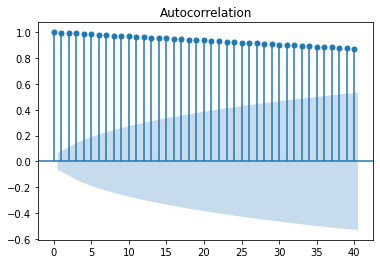

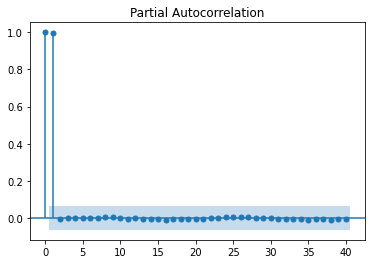

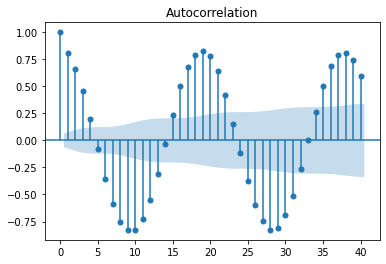

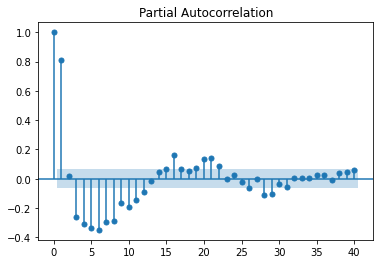

In [8]:
# ARIMA пример

# модельный ряд
np.random.seed(21)

data_model_d = np.array([10*np.sin(x/3) + 10*np.random.random(1) for x in range(1, 1000)])
data_model = data_model_d.cumsum()



N=50   # число точек для теста


sm.graphics.tsa.plot_acf(data_model[:-N], lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(data_model[:-N], lags=40)
plt.show()

## производная

sm.graphics.tsa.plot_acf(data_model_d[:-N], lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(data_model_d[:-N], lags=40)
plt.show()


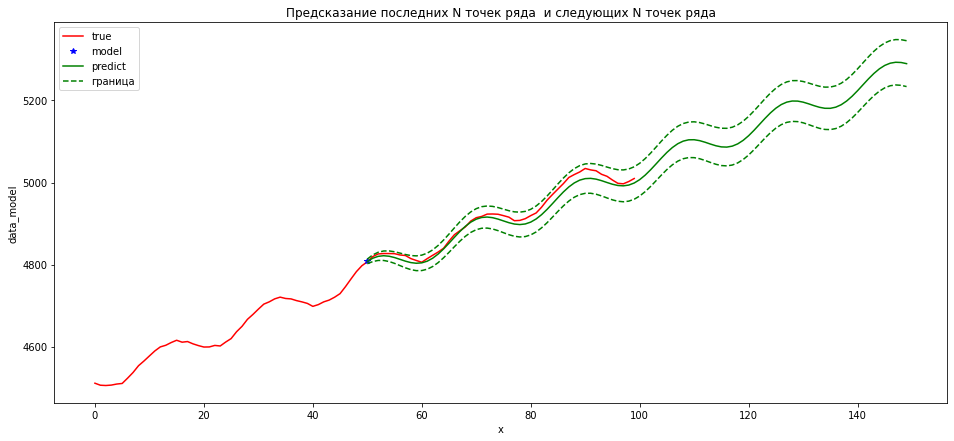

In [10]:

# строим модель
model = ARIMA(data_model[:-N], order=(2,1,2))
model_fit = model.fit(disp=False)
# делаем оценку старых значений
y_p = model_fit.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)

plt.figure(figsize=(16,7))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

In [51]:
# Определим p, d и q 
q = 0
p = 2
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 1
ds = 0
seasonal_pdq = [ps, ds, qs ,20] 

In [52]:
#для построения модели используем все данные, кроме 12-х последних недель (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod_sarimax = sm.tsa.statespace.SARIMAX(data_model[:-N],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod_sarimax.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))


SARIMAX[2, 1, 0]x[1, 0, 1, 20] - AIC:5233.473362594964


In [53]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  949
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 20)   Log Likelihood               -2611.737
Date:                              Mon, 02 Nov 2020   AIC                           5233.473
Time:                                      21:20:07   BIC                           5257.628
Sample:                                           0   HQIC                          5242.688
                                              - 949                                         
Covariance Type:                                opg                                         
============================================================================================ ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

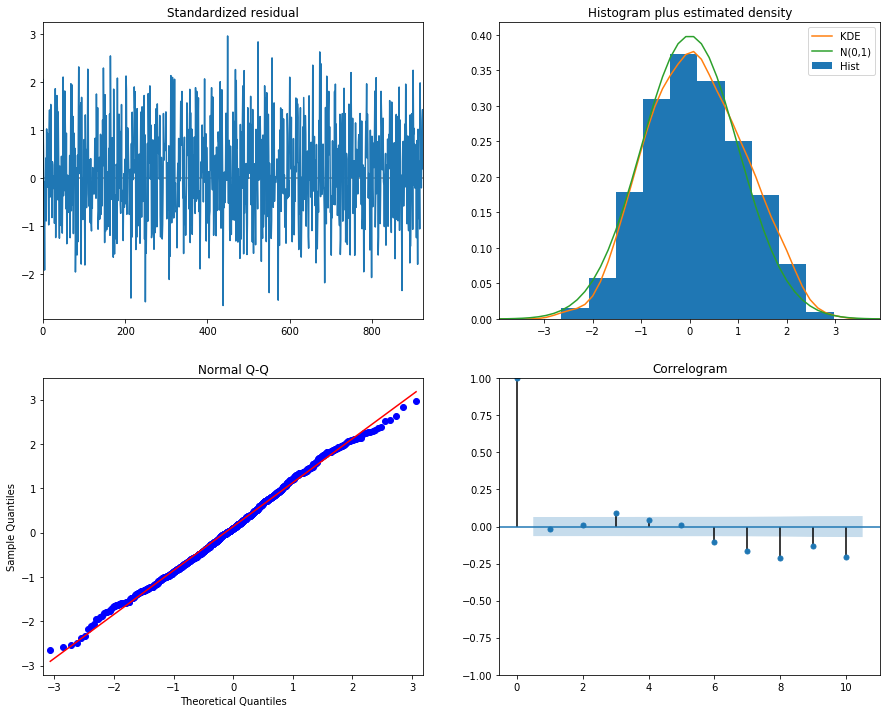

In [54]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

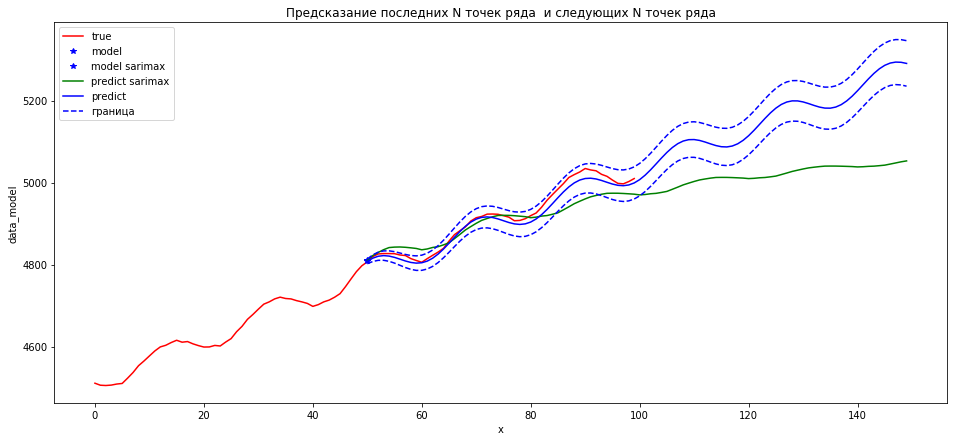

In [55]:
nforecast = N  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = model_fit.forecast(nforecast)    #делаем предсказание на 30 точtк от текущего конца ряда
pred_dynamic_opt = results.forecast(nforecast)

y_ps = results.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_fs = results.forecast(2*N )

plt.figure(figsize=(16,7))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(N,y_ps,'*b',label ='model sarimax')
plt.plot(np.arange(2*N)+N,y_fs,'g',label ='predict sarimax')
plt.plot(np.arange(2*N)+N,y_f[0],'b',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--b', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--b')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

In [17]:

# Определим p, d и q в диапазоне 0-3
p =  range(0, 1)
d =  range(0, 1)
q = range(0, 2)
# зададим сетку p, q и q
pdq = [[1,1,1],[1,1,0]]
# зададим сезонность p, q и q

p = [1] 
d = [1]
q = range(0, 2)

seasonal_pdq = [(x[0], x[1], x[2], 20) for x in list(itertools.product(p, d, q))]

In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_model[:-N],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results_opt = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results_opt.aic))
        except:
            continue

ARIMA[1, 1, 1]x(1, 1, 0, 20)3 - AIC:5230.76643743569
ARIMA[1, 1, 1]x(1, 1, 1, 20)3 - AIC:5218.656732988782
ARIMA[1, 1, 0]x(1, 1, 0, 20)3 - AIC:5254.14649017068
ARIMA[1, 1, 0]x(1, 1, 1, 20)3 - AIC:5247.433403722725


In [20]:
results_ = sm.tsa.statespace.SARIMAX(data_model[:-N],order=[1,1,1],
                                seasonal_order=[1,1,1,20] ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results_opt = results_.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[[1, 1, 1], [1, 1, 0]]x[(1, 1, 0, 20), (1, 1, 1, 20)] - AIC:5236.519112592618


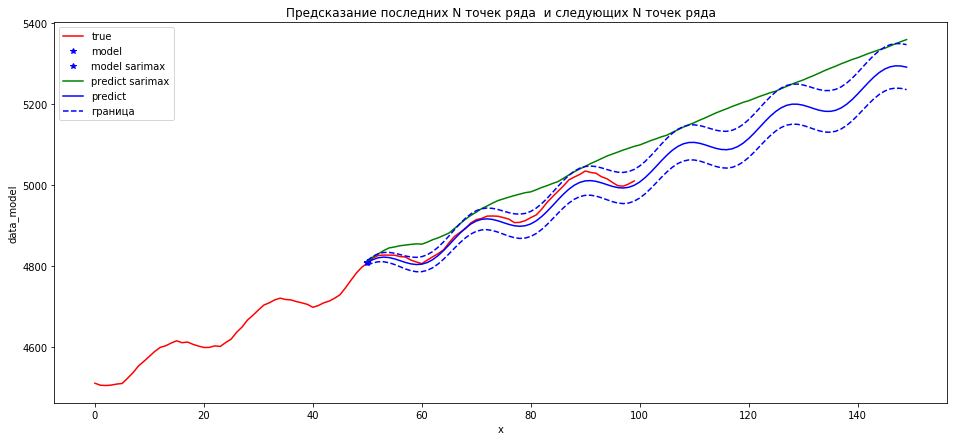

In [21]:
nforecast = N  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = model_fit.forecast(nforecast)    #делаем предсказание на 30 точtк от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(nforecast)

y_ps = results_opt.predict(len(data_model[:-N]), len(data_model[:-N]), typ='levels')
y_fs = results_opt.forecast(2*N )

plt.figure(figsize=(16,7))
plt.plot(data_model[-N*2:],'r',label ='true')
plt.plot(N,y_p,'*b',label ='model')
plt.plot(N,y_ps,'*b',label ='model sarimax')
plt.plot(np.arange(2*N)+N,y_fs,'g',label ='predict sarimax')
plt.plot(np.arange(2*N)+N,y_f[0],'b',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--b', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--b')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()


Общая рекомендация для оценки параметров:

- p = 1 : ACF - экспоненциально убывает, PACF - имеет резко выделяющееся значение для лага 1, нет корреляций на других лагах.

- p = 2 : ACF имеет форму синусоиды или экспоненциально убывает, PACF имеет резко выделяющиеся значения на лагах 1, 2, нет корреляций на других лагах.

- q = 1: ACF имеет резко выделяющееся значение на лаге 1, нет корреляций на других лагах, PACF экспоненциально убывает.

- q = 2: ACF имеет резко выделяющиеся значения на лагах 1, 2, нет корреляций на других лагах, PACF имеет форму синусоиды или экспоненциально убывает.

- p = 1 и q = 1: ACF экспоненциально убывает с лага 1, PACF - экспоненциально убывает с лага 1.




## Потребление энергии

Временной ряд связан с измерением потребления энергии в отдельных регионах США в период 2002 по 2018 г. (PJM Hourly Energy Consumption Data
https://www.kaggle.com/robikscube/hourly-energy-consumption). Содержит часовые измерения и после обработки добавлены метки по времени для календаря.


Загрузим файл с данными и посмотрим на таблицу их организующую.

In [4]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Описательная статистика практически не изменилась после обработки пропусков, сортировки и удаления дублей.

In [5]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Общий вид изменения ключевого свойства ряда приведен на рис.1.

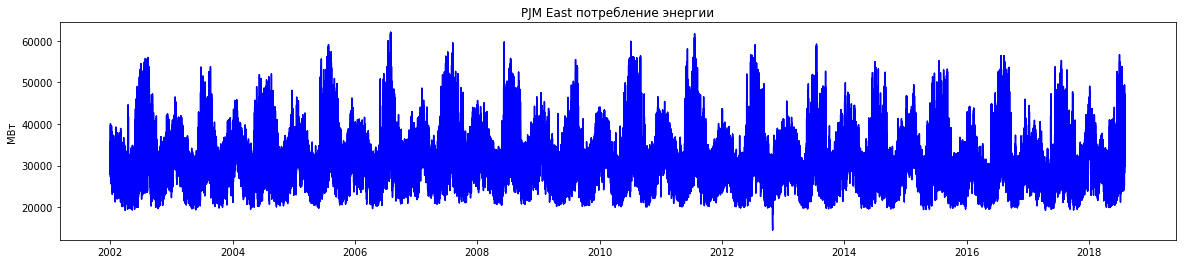

In [6]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Рис.1. Потребление энергии

In [7]:
data_d = data.copy().resample('D').mean()


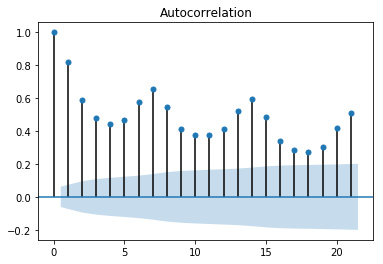

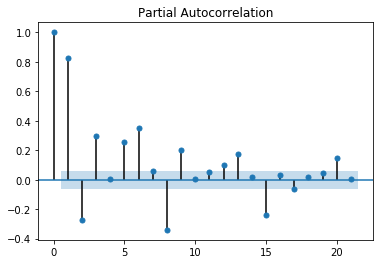

In [8]:

sm.graphics.tsa.plot_acf(data_d['PJME_MW'].values[:1000], lags=7*3)
plt.show()

sm.graphics.tsa.plot_pacf(data_d['PJME_MW'].values[:1000], lags=7*3)
plt.show()

In [49]:
import warnings

# Определим p, d и q 
q = 2
p = 0
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 2
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,7] 

In [50]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [0, 2, 2]    : ps,ds,qs, S= [0, 0, 2, 7]


In [54]:
#для построения модели используем все данные, кроме 12-х последних недель (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения


N1 =300   # берем дданные не от начала - так быстрее работает
N2=50  # число точек для теста
nforecast = N2+30

mod = sm.tsa.statespace.SARIMAX(data_d['PJME_MW'].values[N1:-N2],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 2, 2]x[0, 0, 2, 7] - AIC:103721.93439707701


In [55]:
print(results.summary().tables[0],results.summary().tables[1])

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 5709
Model:             SARIMAX(0, 2, 2)x(0, 0, 2, 7)   Log Likelihood              -51855.967
Date:                           Tue, 03 Nov 2020   AIC                         103721.934
Time:                                   01:09:28   BIC                         103755.167
Sample:                                        0   HQIC                        103733.506
                                          - 5709                                         
Covariance Type:                             opg                                         
========================================================================================= ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

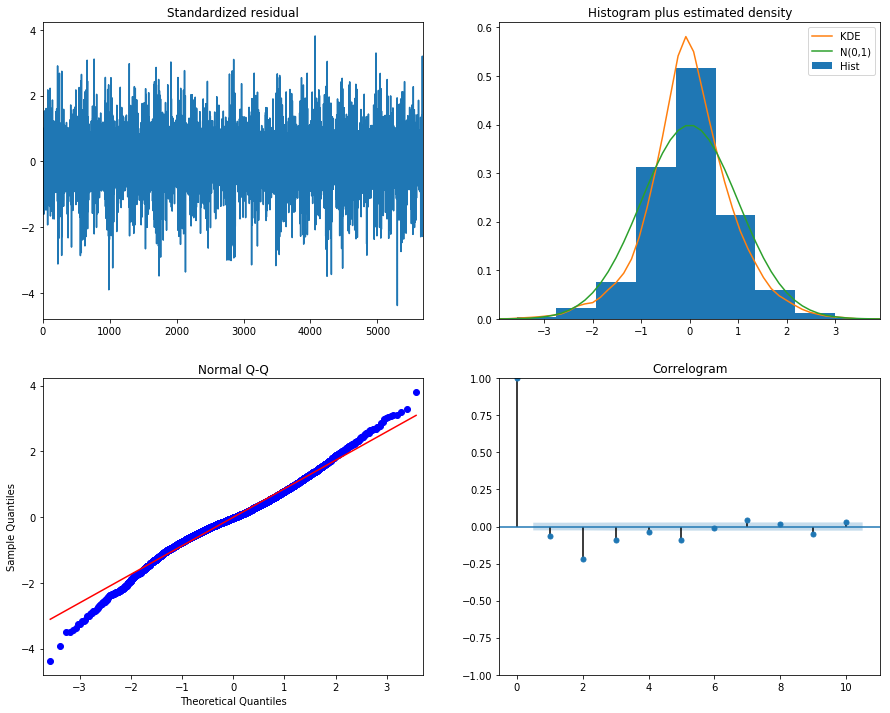

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Подобрать параметры модели можно используя сеточный выбор как это сделано для ряда "Потребление энергии" ниже (работает долго!):

- На основании анализа выбираем диапазон изменения параметров сезонности и остатка ряда (для этой модели берем [0,3]).
    
- задаем длину сезона (52 - полный сезон или  26 недель - зимой греем, летом кондиционируем и расход энергии примерно одинаковый)
    
- Запускаем генерацию сетки с использованием модуля itertools (itertools.product(p, d, q) - сгенерит декартово множество по p,d,q диапазонам) и задаем полный список вариантов.
    
- Запускаем генерацию SARIMAX - с параметрами и возвращаем AIC.
    
- Лучшее значение параметров (при минимальной оценке AIC) используем для настройки финальной модели.

In [68]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 0, 7)
SARIMAX: (0, 0, 2) x (0, 0, 0, 7)
SARIMAX: (0, 0, 2) x (0, 0, 1, 7)


In [ ]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_d['PJME_MW'].values[300:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)3 - AIC:135244.27361320323
ARIMA(0, 0, 0)x(0, 0, 1, 7)3 - AIC:131120.0357044722
ARIMA(0, 0, 0)x(0, 0, 2, 7)3 - AIC:130007.8291408267
ARIMA(0, 0, 0)x(0, 1, 0, 7)3 - AIC:110661.0603569819
ARIMA(0, 0, 0)x(0, 1, 1, 7)3 - AIC:109440.95174919069
ARIMA(0, 0, 0)x(0, 1, 2, 7)3 - AIC:109288.75258506392
ARIMA(0, 0, 1)x(0, 0, 0, 7)3 - AIC:130969.62571360465
ARIMA(0, 0, 1)x(0, 0, 1, 7)3 - AIC:129864.85900424299
ARIMA(0, 0, 1)x(0, 0, 2, 7)3 - AIC:129428.15837541476
ARIMA(0, 0, 1)x(0, 1, 0, 7)3 - AIC:107600.30869960757
ARIMA(0, 0, 1)x(0, 1, 1, 7)3 - AIC:106376.85889062
ARIMA(0, 0, 1)x(0, 1, 2, 7)3 - AIC:106143.25370110315
ARIMA(0, 0, 2)x(0, 0, 0, 7)3 - AIC:129964.59047063279
ARIMA(0, 0, 2)x(0, 0, 1, 7)3 - AIC:129470.20504607054
ARIMA(0, 0, 2)x(0, 0, 2, 7)3 - AIC:129230.83510502911
ARIMA(0, 0, 2)x(0, 1, 0, 7)3 - AIC:105250.94050643782
ARIMA(0, 0, 2)x(0, 1, 1, 7)3 - AIC:103236.29672726207
ARIMA(0, 0, 2)x(0, 1, 2, 7)3 - AIC:103094.78154916444
ARIMA(0, 1, 0)x(0, 0, 0, 7)3 - AIC

In [17]:
# время обработки - около 2 часов (5500 экземпляров )
# ARIMA(1, 0, 1)x(0, 1, 2, 7)3 - AIC:101494.09498681925
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)

N1 =300   # берем дданные не от начала - так быстрее работает
N2=50  # число точек для теста
nforecast = N2+30

mod = sm.tsa.statespace.SARIMAX(data_d['PJME_MW'].values[N1:-N2],order=[1,0,1],
                                seasonal_order=[0,1,2,7] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)


AIC:{} 101099.50933622164


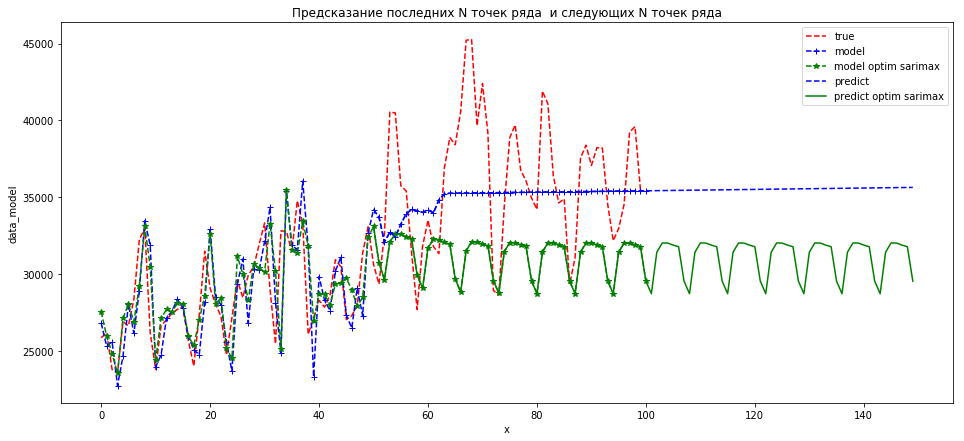

In [61]:
nforecast = N2  # полное число предиктов (тест+ чистый предикт)
N4 = 50
y_p = results.predict(len(data_d['PJME_MW'].values[N1:-N2])-N4, N4+len(data_d['PJME_MW'].values[N1:-N2]), typ='levels')
y_ps = results_opt.predict(len(data_d['PJME_MW'].values[N1:-N2])-N4, N4+len(data_d['PJME_MW'].values[N1:-N2]), typ='levels')
y_f = results.forecast(2*N2 )
y_fs = results_opt.forecast(2*N2 )

plt.figure(figsize=(16,7))
plt.plot(data_d['PJME_MW'].values[-N2*2:],'--r',label ='true')
plt.plot(range(N2-N4,N2+N4+1),y_p,'+--b',label ='model')
plt.plot(range(N2-N4,N2+N4+1),y_ps,'*--g',label ='model optim sarimax')
plt.plot(np.arange(2*N2)+N2,y_f,'--b',label ='predict')
plt.plot(np.arange(2*N2)+N2,y_fs,'g',label ='predict optim sarimax')

plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

Поймали недельный цикл, но нет циклов сезонных (нужно будет делить на 2 модели)

Сделаем штатный вывод результатов предсказания на график

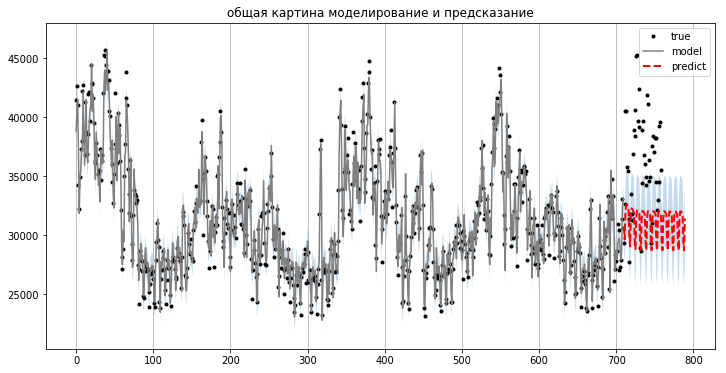

In [27]:
N3=5000  # отступ данных для отображения  модели (для улучшения визуальных качеств рисунка - берем из интервала [0-500])
nforecast = N2+30  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_d['PJME_MW'].values[N3+N1:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

## Brent 2010-2019
Перейдем ко второму примеру. Цена нефти марки Brent. Данные по дням от 2010 до 2019 . Данные были обработаны, но не меняли основное содержание ключевого признака. Отличие от исходного описания - дополнение признаками по календарю, как и в первом примере.

In [62]:


path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Основные статистики ряда остались без изменений.

In [63]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


Общий вид изменения цены по ряду приведен на рис.2.

Text(0.5, 0, 't')

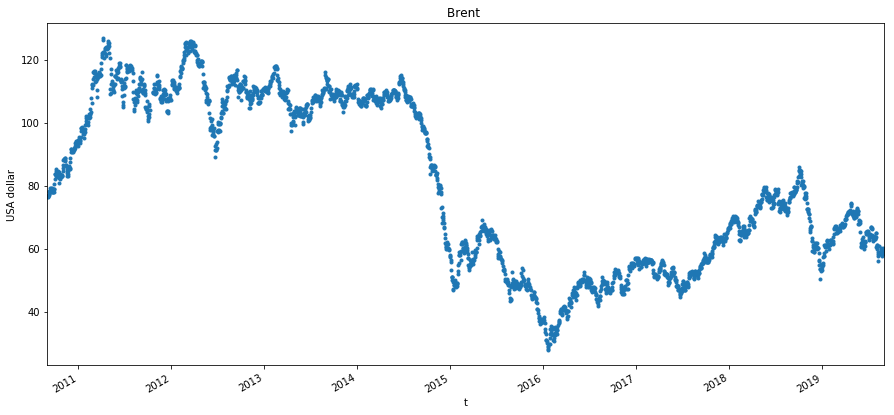

In [64]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Рис.3 Цена нефти с 2010 по 2019

Проведем исследование параметров в диапазонах "разумного" изменения параметров модели:

Лучшие результаты на недельных данных параметры модели SARIMA(1,1, 2)x(0, 1, 2, 52) - AIC:6867.79 (для p,q,d,ps,ds,qs из диапазона [0,1,2]).

Проведем моделирование прогноза на основе найденой SARIMAX[1, 1, 2]x[0, 1, 2, 52]  и модели  SARIMA(1, 2, 2)x(0, 0, 1, 52) для последних 12 дней(и предсказание следующих 30 )  и сравним их с фактом.

In [65]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8492,0.006,133.906,0.000,0.837,0.862
ma.L1,0.3637,0.011,34.080,0.000,0.343,0.385
ma.S.L7,-0.9564,0.012,-82.594,0.000,-0.979,-0.934
ma.S.L14,-0.0342,0.012,-2.958,0.003,-0.057,-0.012
sigma2,3.013e+06,4.07e+04,74.060,0.000,2.93e+06,3.09e+06


Видно, что предсказание новых точек тем слабее, чем дальше от последней известной точки ряда. Это можно объяснить тем, что накапливается ошибка предсказания или изменились условия развития ряда (наш котенок перестанет когда-нибудь расти и следовательно его скорость и маневренность долгое время не будут изменяться). Кроме того, модель, которую выбрали по сетке, заметно лучше обходит точки известные нам заранее и имеет более сложный характер. Таким образом, подбор позволил улучшить исходный результат для ряда с сезонами и циклами. 

Повторим процесс для второго ряда "Цена нефти Brent" и посмотрим на особенности моделирования такого ряда. Напомним, что нет сезонности, есть интегральность, есть изменяющиеся во времени тенденции (временные ряды 2).

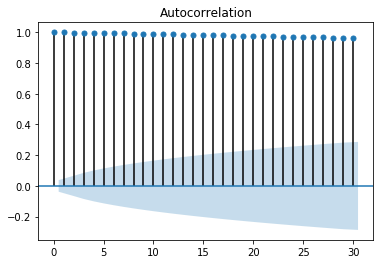

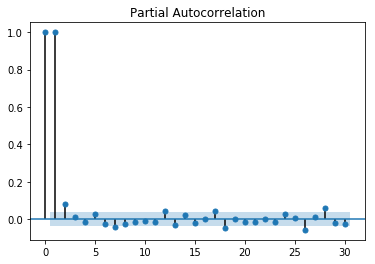

In [66]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=30)
plt.show()

Построим ACF и PACF для первых разностей

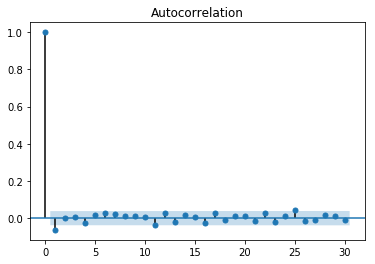

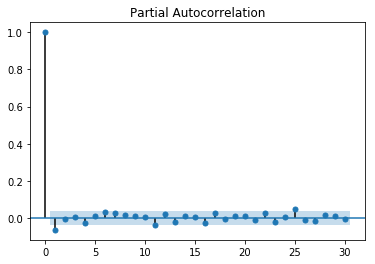

In [67]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
brent_dif = brent_data['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()

Дневные графики показывают автокорреляцию цены со всеми значениями ранее (это не очень хорошо) и для на PACF мы видим, что только 1-й порядок разностей важен для нашего процесса (AR 1). Это полностью согласуется с проведенным ранее анализом. Таким образом:
 - Сезона нет.
 - ACF - медленно падает для дневныхи графиков, а для первых разностей ACF - быстро падает (не более 1-й корреляции)  
 - PACF - быстро пададает,  а для первых разностей РACF - быстро падает (не более 1-й корреляции) 
 - q , p - берем р=1(2) (PACF) , q =1(2) (скорее всего не очень большой после производной)
 - ADF - 1 раз интегрируемый - d = 1 

Запустим модель без сезонного анализа (ARIMA)


In [68]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2=30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:8588.988630267817
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2637
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -4288.494
Date:                Tue, 03 Nov 2020   AIC                           8588.989
Time:                        01:15:49   BIC                           8624.246
Sample:                             0   HQIC                          8601.755
                               - 2637                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    

Коэффициент модели  ar.L2 имеет малое абсолютное значение, что свидетельствует о том, что он не играет роли при определении ответа модели. посмотрим на визуализацию результатов работы модели, где видно, что остатки ряда распределены не одинаково на краях модели и в ее основной части, что не позволит принимать правильное решение (рис.Normal Q-Q, Standardized rezidual)

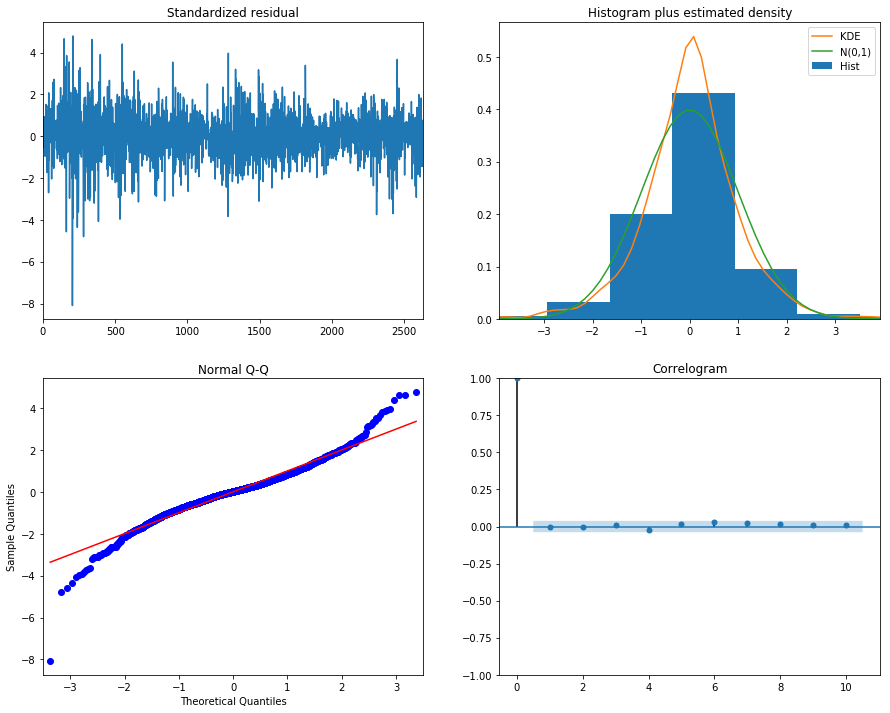

In [69]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

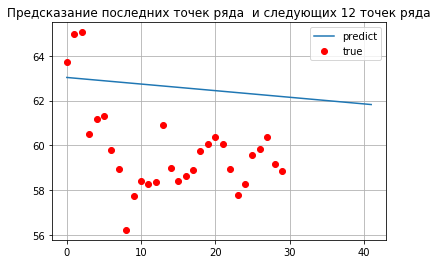

In [38]:
pred_dynamic = resultsb.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-30:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

Для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q), используем сеточный поиск

In [ ]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data['Значение'].values[:-100]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

 Поиск по сетке определяет модель ARIMA(1, 1, 0)- AIC:-13993.81

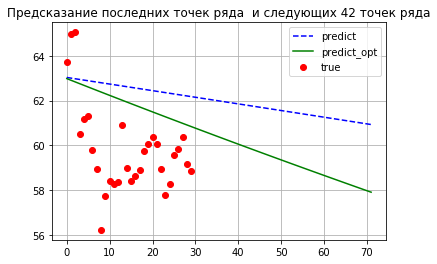

In [39]:

N2=30
nforecast = N2+42

modb_opt = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 30 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(72) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.legend()
plt.grid()
plt.show()

Улучшеная модель ближе к первым по времени точкам выборки на отрезке предсказания. Однако общий результат моделирования еще далек от идеала. Проверим остатки модели.

In [40]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,0.3562,0.160,2.224,0.026,0.042,0.670
drift,-9.469e-05,4.6e-05,-2.060,0.039,-0.000,-4.6e-06
ar.L1,0.9971,0.001,740.257,0.000,0.994,1.000
ma.L1,-0.0623,0.016,-3.897,0.000,-0.094,-0.031
sigma2,1.5170,0.025,60.334,0.000,1.468,1.566


Посмотрим на модель на этапе предсказания и этапе описания данных

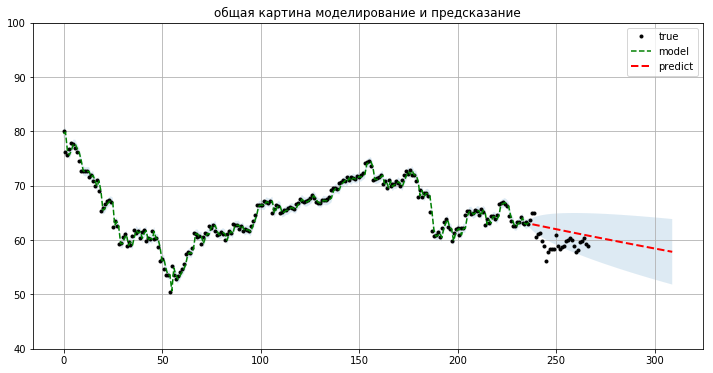

In [41]:
N2=30 # число точек для теста
nforecast = N2+42  # общее число точек для предсказания (тест+ чистое предсказание)
N3=2400  # отступ от начала известной информации для визуализации - так виднее (можно брать 0-2600)
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_data['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

In [42]:

adf_test = sm.tsa.stattools.adfuller(resultsb_opt.resid)
print(adf_test)


(-80.24885030948923, 0.0, 0, 2636, {'1%': -3.4328331864239274, '5%': -2.8626370834536976, '10%': -2.56735401579277}, 8506.238580534135)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков.  

Посмотрим на модель для 1-х разностей.

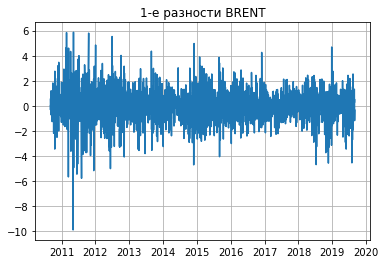

In [43]:
plt.plot(brent_dif)
plt.grid()
plt.title('1-е разности BRENT')
plt.show()

In [44]:


import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0,1)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_bd = sm.tsa.statespace.SARIMAX(brent_dif[100:-100],order=param,seasonal_order=[0,0,0,0],
                                          stepwise=False, approximation=False, max_order=2)

        results_ = mod_bd.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:8071.704148175584
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:9926.5639363134
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:8064.22003396567
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:9119.372696938808


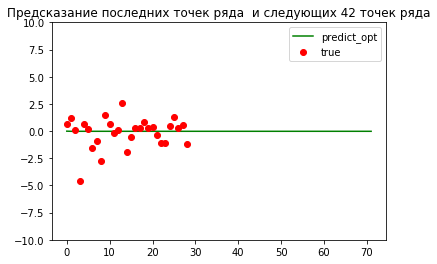

In [45]:
N1=100
N2=30
nforecast = N2+42
modb_optd = sm.tsa.statespace.SARIMAX(brent_dif[N1:-N2],
                               order=[1,0,0],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_optd = modb_optd.fit()
#делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_optd.forecast(nforecast) 

plt.plot(pred_dynamic_opt.values,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_dif.values[-N2:-1],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.ylim([-10,10])
plt.legend()
plt.plot()
plt.show()

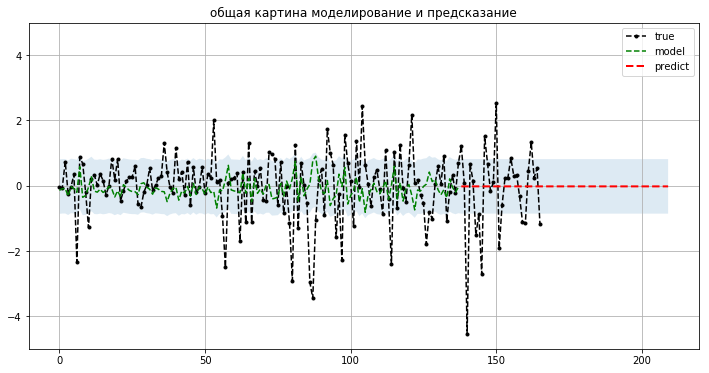

In [46]:
N3 = 2400
predict_ = resultsb_optd.get_prediction(end=resultsb_optd.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_dif.values[N3+N1:-1], '--k.',label='true')
plt.ylim([-5,5])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast]*5, '--g',label='model') # увеличена амплитуда в 5 раз - иначе не видно
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci.iloc[N3:, 0], predict_ci.iloc[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

Модель "Идеальна" , т.к. это случайное биение, которое ARIMA предсказывает очень хорошо (описываем параметры шума).

## Сохраниение модели

In [ ]:
resultsb_opt.save('rez_model.h5') # и обратно t_rez = sm.load('rez_model.h5')

## Выводы

1. Модель ARIMA строить линейное описание, но берет сложные входные признаки

2. Для анализа параметров ARIMA используем ACF, PACF

3. Моделей хороших много 

4. Поиск модели проводим через перебор нескольких в разумном диапазоне параметров

5. Выбираем ту, что "хорошая" и маленькая

6. Модель имеет ограничения (применима не всегда)



# Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4.  Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
    


5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.